# Pandas 

Pandas provides numerous tools to work with tabular data like you'd find in spreadsheets or databases. It is widely used for data preparation, cleaning, and analysis. It can work with a wide variety of data and provides many visualization options. It is built on top of NumPy.

### Modules

In [194]:
import numpy as np
import pandas as pd
import pymysql
import sys
import matplotlib.pyplot as plt

### Series

In [2]:
# series are 1D data structures
list1 = ['a', 'b', 'c', 'd'] # data
labels = [1, 2, 3, 4]        # labels for data

# create table with list
series_1 = pd.Series(data=list1, index=labels)
series_1

# create table with numpy array
array = np.array([1, 2, 3, 4])
series_2 = pd.Series(array)
series_2

# create table with dictionary
dict_1 = {"Name": "Samrat", "Age": 18, "Address": "Pokhara-5"}
series_3 = pd.Series(dict_1)
series_3
series_3["Name"]
series_3.dtype

# Basic Maths operations with series (series must be of same type)
series_2 + series_2 # add
series_2 - series_2 # substract
series_2 * series_2 # multiply
series_2 / series_2 # divide

# pass series into numpy methods
np.exp(series_2) # returns the exponential value in series_2

# If we try to operate between two dict-series with different index values, NaN is returned
series_4 = pd.Series({4:5, 5:6, 6:7, 7:8})
series_2 + series_4

# Assign names to series
series_5 = pd.Series({1: 2, "samrat": 5, "name": "naruto", 6: "hinata"}, name="Random Dict")
series_5.name
series_6 = pd.Series([1, 2, 3, 4], name="Series 6")
series_6.name

'Series 6'

### Data Frames

In [74]:
array1 = np.random.randint(10, 50, size=(2, 3))
array1

# create dataframes using array1 along with row and columns
pd.DataFrame(array1, ["A", "B"], ["C", "D", "E"])
# ["A", "B"] == row | ["C", "D", "E"] == column


# Create dataframe with multiple series
dict2 = {"one": pd.Series([1., 2., 3.], index=["a", "b", "c"]),
         "two": pd.Series([1., 2., 3., 4.], index=["a", "b", "c", "d"])}
dataframe2 = pd.DataFrame(dict2)


# Accept column labels and list
dict( [ ("A", [1, 2, 3]), ("B", [4, 5, 6]) ] )
pd.DataFrame.from_dict(dict( [ ("A", [1, 2, 3]), ("B", [4, 5, 6]) ] ))


# assign keys as rows label and columns label
dataframe = pd.DataFrame.from_dict(dict( [ ("A", [1, 2, 3]), ("B", [4, 5, 6]) ] ),
                      orient='index', columns=["one", "two", "three"] )


# two find no. of rows and columns inside a dataframe
dataframe.shape

(2, 3)

### Edit & Retrieve Data

In [4]:
# -------------------------Retrieve Data from DataFrame----------------------------
print(dataframe)
dataframe["one"] # retrieve data from single column as series
dataframe[ ["two", "three"] ] # retrieve data from multiple column as series

dataframe.loc['A'] # retrieve data from row as series
dataframe.iloc[1]  # retrieve data from row using index position

dataframe.loc['A', 'three'] # retrieve specific data from specific row and column
dataframe.loc[ ['A', 'B'], ['one', 'three'] ] # data from multiple row and column



# -------------------------Edit Data from DataFrame----------------------------


# create a new column
dataframe['Total'] = dataframe['one'] + dataframe['two'] + dataframe['three']
# create new column which stores the summation of data in other columns within a row
dataframe['Multi'] = dataframe['one'] * dataframe['two'] * dataframe['three']
# create new column with stores the multiplication of data in other columns within a row
dataframe


# create new row
# dict3 = {'one': 5, 'two': 6, 'three': 7}
# new_row = pd.Series(dict3, name='C')
# dataframe = dataframe.append(new_row)
# dataframe


# delete a dataframe column
dataframe.drop('Multi', axis=1, inplace=True)  # axis = 1 denotes columns
# other way of deleting column
# del dataframe['E'] # single column
# del dataframe['D', 'F'] # multiple column


# delete a dataframe column
# dataframe = dataframe.drop('C', axis=0, inplace=True)  # axis = 0 denotes row
# dataframe = dataframe.drop(['F', 'G']) # multiple row


# create a new column and make it the index (in place of A, B and C)
# dataframe['Sex'] = ['Man', 'Woman']
# dataframe.set_index('Sex', inplace=True)


# reset index values ro numbers
# dataframe.reset_index(inplace=True)


# use assign to create a column while leaving the original dataframe untouched
dataframe2.assign(div=dataframe2['one'] / dataframe2['two'])
# another way of doing it
dataframe2.assign(multi=lambda x: (x['one'] * x['two']))


# combine dataframes
dataframe3 = pd.DataFrame( {'A': [1., np.nan, 3., np.nan]} )
dataframe4 = pd.DataFrame( {'A': [8., 9., 2., 4.]} )
dataframe3.combine_first(dataframe4)
# keeps the values of dataframe3 and replaces corresponding elements from dataframe4 
# incase there are NaN values in dataframe3

   one  two  three
A    1    2      3
B    4    5      6


,A
0,1.0
1,9.0
2,3.0
3,4.0


### Conditional Selection

In [5]:
array2 = np.random.randint(10, 50, size=(2, 3))
dataframe5 = pd.DataFrame(array2, ['A', 'B'], ['C', 'D', 'E'])
print(dataframe5)


# Returns True or False according to condition applied
dataframe5 > 40   # Returns True if the data are greater than 40 else returns False
dataframe5.gt(40) # another way of doing it
dataframe5 <= 40  # smaller than or equal to
dataframe5 != 40  # not equal to
dataframe5 == 40  # equal to
# gt - greater than
# lt - less than
# ge - greater than or equal to
# le - less than or equal to
# eq - equal to
# ne - not equal to


# returns only the true values else returns NaN
bool1 = dataframe5 <= 45
dataframe5[bool1]


# compare a specific column
dataframe5['C'] < 40
# returns True or False if the data in column C is smaller than 40 or not
dataframe5[['C', 'D']]  < 40 # multiple columns


# compare a specific row
dataframe5[ dataframe5['E'] > 30 ]
# returns the row if the value in column 'E' is greater than 30
dataframe5[ dataframe5[['C', 'E']] > 30 ] # for mutiple rows


# stack the commands
dataframe5[ dataframe5['E'] > 20 ]['C']
# get the row where data in column E is greater than 20 and get the column C from that row


# use multiple different conditions
array3 = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
dataframe6 = pd.DataFrame(array3, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
print(dataframe6)
# use array3 as the datasets, ['A', 'B', 'C'] as rows and ['X', 'Y', 'Z'] as columns label
dataframe6[ (dataframe6['X']>3) & (dataframe6['X']<7) ] 
# returns the row in which the data in column X is greater than 3 and smaller than 7
# for OR, use | instead of &

    C   D   E
A  28  27  22
B  38  30  20
   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9


,X,Y,Z
B,4,5,6


### File Input & Output

Pandas can work with the following types of data : CSV, Plain Text, JSON, XML, PDF, SQL, HTML, XLSX, DOCX, ZIP, Images Hierarchical Data Format, MP3, and MP4.

In [8]:
# get data from a csv file
csDF = pd.read_csv('ComputerSales.csv')
csDF

# save it as csv file
csDF.to_csv('csv_ComputerSales.csv')

# read excel file
pd.read_excel('Financial Sample.xlsx')

# save the file as excel (.xlsx) file
csDF.to_excel('excel_ComputerSales.xlsx')

# read the saved excel file
pd.read_excel('excel_ComputerSales.xlsx')

# get one column worth of data from csv
pd.read_csv('ComputerSales.csv', usecols=['Sex'])
pd.read_csv('ComputerSales.csv', usecols=['Sex', 'Contact']) # for multiple columns


# --------------------Working with Database-------------------

# connect with database
try:
    db_conn = pymysql.connect(db='learnsql', user='root', passwd='samrat@123#',
                              host='localhost', port=3306)
    studentDF = pd.read_sql('SELECT * FROM sample_students', con=db_conn)
#     print(studentDF)
    
except Exception as e:
    print("Exception: \n" + str(e))
    
finally:
    db_conn.close()
    

# Insert data into database
try:
    db_conn = pymysql.connect(db='learnsql', user='root', passwd='samrat@123#',
                              host='localhost', port=3306)
    cursor = db_conn.cursor()
    insertData = "INSERT INTO sample_students VALUES(20060106, 'Adhikari', 'Samrat')"
    cursor.execute(insertData)
    db_conn.commit()
    
    studentDF = pd.read_sql('SELECT * FROM sample_students', con=db_conn)
    # print(studentDF)
    
except Exception as e:
    print("Exception: \n" + str(e))
    
finally:
    db_conn.close()

    


### Maths

In [14]:
# getting specific rows
csDF.head()  # to get first 5 results
csDF.tail()  # to get last 5 results
csDF[:2]     # to get first 2 results
csDF[3:16:2] # to result from 3rd to 15th row skipping 1 row at a time

# get index of the rows in dataframe
csDF.index.array 

# convert the dataframe to numpy array
csDF.to_numpy()

# convert our series to an array
series_1.array


# New Dataframe
dict4 = { 'one': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
          'two': pd.Series([1, np.nan, 3, 4], index=['a', 'b', 'c', 'd'])
        }
# create the dataframe
dataframe7 = pd.DataFrame(dict4)
dataframe7

# replace NaN values inside dataframe
dataframe7.fillna(0, inplace=True) #inplace=True replaces the value permanently

# get the values in row 2
row = dataframe7.iloc[1]
# add values of row 2 to all the rows including row 2 (x = x + 1)
dataframe7.add(row, axis='columns')

# get the values in column two
col = dataframe7['two']
# sub values of column 'two' to all the columns including column two
dataframe7.sub(col, axis=0)

# to check if our dataframe is empty
dataframe7.empty

# transform: execute a function on a dataframe
dataframe8 = pd.DataFrame( { 'A': range(3), 'B': range(1, 4) } )

# add 1 to every single value in dataframe
dataframe8.transform(lambda x: x+1)

# square all the value in dataframe
dataframe8.transform(lambda x: x**2)

# square root all the values in dataframe
dataframe8.transform(lambda x: np.sqrt(x))

# use multiple lambda functions
dataframe8.transform( [lambda x: [x**3,  x + 1]] )
dataframe8.transform( [np.sqrt, np.exp] )

# assign two different functions to two different columns
dataframe8.transform( {'A': lambda x: x**2, 'B': lambda x: x**3 } )

# using map function
dataframe8['A'].map(lambda x: x**4)
# another way of doing it, but for all columns
dataframe8.applymap(lambda x: x**4)

# get unique values
print(dataframe7)
dataframe7.loc['c'].unique() # from row
dataframe7['two'].unique()   # from column

# get no of unique values
dataframe7.loc['c'].nunique() # from row
dataframe7['two'].nunique()   # from column

# find the no of times a value showed up
dataframe7['two'].value_counts()

# get columns name
dataframe7.columns

# get row name (index)
dataframe7.index

# check if the dataframe contains any null values
dataframe7.isnull() # returns True if there are any null values

   one  two
a  1.0  1.0
b  2.0  0.0
c  3.0  3.0
d  0.0  4.0


,one,two
a,False,False
b,False,False
c,False,False
d,False,False


### Group Data

In [22]:
dict5 = {'Store': [1, 2, 1, 2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'],
        'Sales': [26, 12, 18, 22]}
dataframe9 = pd.DataFrame(dict5)
dataframe9


# group data by store number
byStore = dataframe9.groupby('Store')
# groupby - group rows based off of columns and perform a function that combines that values
# a function that combines values is called an aggregate function

byStore.mean() # get mean values in sales for both of the stores
byStore.sum()  # get sum of sales for each store (26+18) and (12+22)
byStore.sum().loc[1] # get the sum of sales for store 1 only


# get whole bunch of data with describe function
byStore.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

### Concatenate, Merge & Join Data

In [47]:
# concatinate two dataframes (add/ stack two dataframes with different indexes)
dataframe10 = pd.DataFrame( {'A': [1, 2, 3], 'B': [4, 5, 6]}, index=[1, 2, 3] )
dataframe11 = pd.DataFrame( {'A': [7, 8, 9], 'B': [10, 11, 12]}, index=[4, 5, 6] )

pd.concat([dataframe10, dataframe11])


# merge two dataframes using their shared key column
dataframe12 = pd.DataFrame( {'A': [1, 2, 3], 'B': [4, 5, 6],    'key':[1, 2, 3]} )
dataframe13 = pd.DataFrame( {'A': [7, 8, 9], 'B': [10, 11, 12], 'key':[1, 2, 3]} )

pd.merge(dataframe12, dataframe13, how='inner', on='key') # keys must me same 
# inner-joint = intersection of our keys
pd.merge(dataframe12, dataframe13, how='right', on='key')
pd.merge(dataframe12, dataframe13, how='left', on='key')
pd.merge(dataframe12, dataframe13, how='outer', on='key') # union of the keys


# join two dataframes (instead of using keys, we will use columns but we will write index)
dataframe14 = pd.DataFrame( {'A': [1, 2, 3], 'B': [4, 5, 6]},    index=[1, 2, 3] )
dataframe15 = pd.DataFrame( {'C': [7, 8, 9], 'D': [10, 11, 12]}, index=[1, 4, 5] )

dataframe14.join(dataframe15, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


### Statistics

In [54]:
iceDF = pd.read_csv('icecreamsales.csv')
iceDF

# total count of both of the columns (temperature and sales)
iceDF.count()

# sum the column values
iceDF.sum()
iceDF.sum(skipna=True) # to skip any NaN values

# -------------------Statistic Functions--------------

iceDF['Sales'].mean()   # get mean for the sales column
iceDF['Sales'].median() # get median for the sales column
iceDF['Sales'].mode()   # get mode for the sales column
iceDF['Sales'].min()    # get min value from the sales column
iceDF['Sales'].max()    # get max value from the sales column
iceDF['Sales'].sum()    # get sum of all the data from the sales column
iceDF['Sales'].product()# get product of all the data from the sales column
iceDF['Sales'].std()    # get standard deviation of the data from the sales column
iceDF['Sales'].var()    # get variance of the data from the sales column
iceDF['Sales'].sem()    # get standard error from the data from the sales column
iceDF['Sales'].skew()   # to find out how much biased (asymmetrical) the data are
# if skew value is +ve, the data has long tail to the right (asymmetry to the right)
# if skew value is -ve, the data has long tail to the left  (asymmetry to the left)
# if skew value is 0,   the data is symmetrical

iceDF['Sales'].kurt()   # short for kurtosis
# it tells how many outlier we have in our data
# <3, that means we have few outliers
# at 3, that means we have a normal distribution
# >3, that means we have a lot of outliers

iceDF['Sales'].quantile(0.5) # get quantile deviation (50% quantile = median)
iceDF['Sales'].cumsum()  # get cummulative sum of all the data in the Sales column
iceDF['Sales'].cumprod() # get cummulative product of all the data in the sales column
iceDF['Sales'].cummax()  # get cummulative sum until the cumsum values <= max value
iceDF['Sales'].cummin()  # get cummulative sum until the cumsum values <= min value

iceDF.describe()# get all the info about our Dataframe
iceDF.describe()# get all the info about our Sales column4

seriesDice = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
# Count for each value in series
seriesDice.value_counts()

print(dataframe2)
dataframe2.agg(np.mean) # get aggregate value
dataframe2.agg(['mean', 'std']) # using multiple different functions 

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


,one,two
mean,2.0,2.500000
std,1.0,1.290994


### Iteration

In [27]:
# Iterating over series
series_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
for col in series_7:
#     print(col)
    pass
    

# Iterating over DFs
array4 = np.random.randint(10, 50, size=(2, 3))
dataframe16 = pd.DataFrame(array4, ['B', 'C'], ['C', 'D', 'E'])
print(dataframe16)

# iterate through columns
for label, series in dataframe16.items():
#     print(label)  # prints individual column index
#     print(series) # prints all row value of each column (label) 
    pass

# iterate through rows
for index, row in dataframe16.iterrows():
#     print(f'{index}\n{row}') # index prints row & 'row' print the column values in each row(index)
    pass

# get tuple that contains our row data
for row in dataframe16.itertuples():
    print(row) # gives row data (index=row name; C, D, E = column value in this row)
    pass

    C   D   E
B  42  40  39
C  35  27  14
Pandas(Index='B', C=42, D=40, E=39)
Pandas(Index='C', C=35, D=27, E=14)


### Sorting

In [33]:
print(dataframe16)

# sort dataframe according to row/index
dataframe16.sort_index()                # ascending order
dataframe16.sort_index(ascending=False) # descending order

# sort dataframe according to column/label/value
dataframe16.sort_values(by='D') # sort according to data in column 'D' in ascending order
# (Use the same function for series)

    C   D   E
B  42  40  39
C  35  27  14


,C,D,E
C,35,27,14
B,42,40,39


### Passing Data to Functions

In [95]:
# get data from a csv file
csDF = pd.read_csv('ComputerSales.csv')

# Get Total Profit from the dataframe that we imported from a csv file
def profit_total(dataframe):
    profit_series = dataframe['Profit']
    print(f'Total Profit: {profit_series.sum()}')
    
profit_total(csDF)


# get contact column and split first and last name and store them in two new columns
def split_contact(dataframe):
    
    names = dataframe['Contact'].apply(get_names)
    # apply get_names function to all the names(rows) in 'Contact' column
    # apply passes contact name from each individual row to get_names function 
    # and store the result (dataframe of first name, and last name to 'names' variable)
    
    dataframe[names.columns] = names
    # here names.columns are ['First Name', 'Last Name'] there are the columns of the dataframe
    # set from the get_names function
    # RHS names are the splitted names of the respective Contacts
    # the splitted names are assigned to each respective rows
    
    return dataframe

def get_names(full_name):
    first, last = full_name.split()
    
    return pd.Series(
            (first, last),
            index=['First Name', 'Last Name'])

# split_contact(csDF)



# assign people to different age groups
def age_group(dataframe):
    bins = [0, 30, 50, sys.maxsize] # these are age classes (0-30, 30-50, 50-maxAge)
    labels = ['<30', '30-50', '>50']
    ageGroup = pd.cut(dataframe['Age'], bins=bins, labels=labels)
    # cut = puts values into certain groups based on interval
    
    # create new column and return the new data 
    dataframe['Age Group'] = ageGroup
    return dataframe

# age_group(csDF)



# pass dataframe to multiple different functions
newDF = csDF.pipe(split_contact).pipe(age_group)
newDF.to_excel('test.xlsx')

Total Profit: 5459.010000000001


### Aligning, Reindexing & Renaming Labels

In [69]:
# -------------------------Align----------------------------------

# aligning series
series_8 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
slice1 = series_8[:4]
slice2 = series_8[1:]

slice1.align(slice2, join='left')  # align based on the values in slice1
slice1.align(slice2, join='right') # align based on the values in slice2
slice1.align(slice2, join='inner') # align based on the intersection values
slice1.align(slice2, join='outer') # align based on the union of the values
slice1.align(slice2)               # another way of aligning based on union

# aligning dataframes
array5 = np.random.randint(10, 50, size=(2, 3))
dataframe17 = pd.DataFrame(array5, ['A', 'B'], ['C', 'D', 'E'])
dataframe18 = pd.DataFrame(array5, ['B', 'C'], ['C', 'D', 'E'])

print(dataframe17)
print(dataframe18)

dataframe17.align(dataframe18) # union
# just like in series, we can use join=['outer', 'inner', 'right', 'left']


# ------------------------Reindex-------------------------
series_8.reindex(['c', 'b', 'a']) # changing the rows of the series using index
dataframe17.reindex(['B', 'A'])   # changing the rows of the dataframe using index

dataframe17.drop(['B'], axis=0)      # remove row B
dataframe17.drop(['D'], axis=1)      # remove column D
dataframe17.drop(['D', 'E'], axis=1) # remove multiple columns


# ---------------------Rename Labels----------------------------
# renaming columns
dataframe17.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Others'}, inplace=True)

# renaming rows
dataframe17.rename(index={'A': 'Married', 'B': 'Unmarried'}, inplace=True)

# key=old column label, value=new column label
# can be done with single or multiple labels
# inplace=True: to change the dataframe permanently

dataframe17

    C   D   E
A  49  24  31
B  34  18  29
    C   D   E
B  49  24  31
C  34  18  29


,Men,Women,Others
Married,49,24,31
Unmarried,34,18,29


### Multi-Index

In [136]:
# multi-level indexing is going to allow us to store data on multiple different dimensions

days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
# three day 1s abd day 2s because people have three meals per day
meals = [1, 2, 3, 1, 2, 3] 
# duplicate data are for the same reason as above

# hierarchy index
hierIndex = list(zip(days, meals))
# zip: pairs our days to meals array and create list of the returned tuples


# convert our list of tuple into each rows
hierIndex = pd.MultiIndex.from_tuples(hierIndex)

# create a random array to put as data in the MultiIndex data structure(dataframe)
# the data represent calories of food eaten by males and females during thier 3 meal period
# for 2 whole days
array6 = np.random.randint(500, 700, size=(6, 2))

# create dataframe with hierIndex as the labels and array6 as their data
# here the heirIndex wont be used for columns so we need to assign columns manually
dataframe19 = pd.DataFrame(array6, hierIndex, ['Male', 'Female'])
# print(dataframe19)

##################################################
# to assign rows and columns from the hierIndex,
# first change the array6 size to (6, 6) and use the code below
# cols = [x[0] for x in hierIndex]
# rows = [x[1] for x in hierIndex]
# dataframe19 = pd.DataFrame(array6, rows, cols)
# dataframe19
##################################################

# find out the data of day 1
dataframe19.loc['Day 1']

# grab first row as a series
dataframe19.loc['Day 1'].loc[1]
dataframe19.iloc[0] # another way of doing it

# grab calories eaten by female on day 2 for the second meal
dataframe19.loc['Day 2'].loc[2]['Female']
dataframe19.iloc[4][1] # another way of doing it

# assign names to day as well as meals columns
dataframe19.index.names = ['Day', 'Meals']
dataframe19

# cross-section of Day 2 
dataframe19.xs('Day 2') # returns a sub-table of the info about Day 2 only

# get data of the 1st meal from both days
dataframe19.xs(1, level='Meals')


# Create a MultiIndex out of a DF using a pivot table
# specially used with microsoft excel
dict_6 = {'A':['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2'],
         'B': [1, 2, 3, 1, 2, 3],
         'C': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
         'D': [1, 2, 3, 4, 5, 6]}
dataframe20 = pd.DataFrame(dict_6)
dataframe20.pivot_table(values='D', index=['A', 'B'], columns=['C'])

# columns=['C] i.e ['Male, 'Female'] becomes the main column
# Make A & B a multilevel index (rows)
# Define column names come from column C
# values='D'are data in the data set
# You will have NaNs where data was missing


C        Female  Male
A     B              
Day 1 1     NaN   1.0
      2     2.0   NaN
      3     NaN   3.0
Day 2 1     4.0   NaN
      2     NaN   5.0
      3     6.0   NaN

### Handling Missing Data

In [156]:
dict_7 = {'A': [1, 2, np.nan], 'B': [4, np.nan, np.nan], 'C': [7, 8, 9]}
dataframe21 = pd.DataFrame(dict_7)
print(dataframe21)

# drop rows with missiong data 
dataframe21.dropna() # drops rows which contains atleast 1 NaN values

# drop columns with missing data
dataframe21.dropna(axis=1) # drops columns which contains atleast 1 NaN values

# drop row which donot have atleast two non NaN values
dataframe21.dropna(thresh=2)

# fill NaN values
dataframe21.fillna(value='newValue') # fill a string
dataframe21.fillna(value=69)         # fill an integer

# fill with the mean value of the data in the column
dataframe21.fillna(value=dataframe21['A'].mean())

# fill with the previous row value (the value from the row above the NaN value)
dataframe21.fillna(method='ffill')
# to fill with next row value, method='bfill'
# in this dataframe, the row 2 doesnt have a row below it, 
# so using bfill wont change the NaN value

     A    B  C
0  1.0  4.0  7
1  2.0  NaN  8
2  NaN  NaN  9


,A,B,C
0,1.0,4.0,7
1,2.0,4.0,8
2,2.0,4.0,9


### Experimenting with Data

In [192]:
# get data from a csv file
csDF = pd.read_csv('ComputerSales.csv')

# get all column names
print(csDF.columns)

# get all datas
csDF.values

# get Profit mean
csDF['Profit'].mean()

# get Product ID with the highest profit
csDF[ ['Product ID', 'Profit'] ].max(axis=0)

# find the data of the people who made purchases from West Virginia
csDF[ csDF['State']=='WV' ]

# find the no of people who made purchases from West Virginia
csDF[ csDF['State']=='WV' ]['State'].count()

# find the no of purchases in 2019
len( csDF[ csDF['Year']==2019 ].index )

# get no of sales for each product type
csDF['Product ID'].value_counts()

# get list of customers that bought a specific product
csDF[ csDF['Product ID']=='M01-F0024' ]['Contact']

# find out how many people made purchase from the website for a profit over $150
csDF[ (csDF['Lead']=='Website') & (csDF['Profit']>150) ]['Lead'].count()

# find out how many product profit amounts include .89 in cents
csDF['Profit'].apply( lambda cents: str(cents).split('.')[1]=='89' ).value_counts()

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year'],
      dtype='object')


False    35
True      4
Name: Profit, dtype: int64

### Data Visualization

<AxesSubplot:ylabel='Pie'>

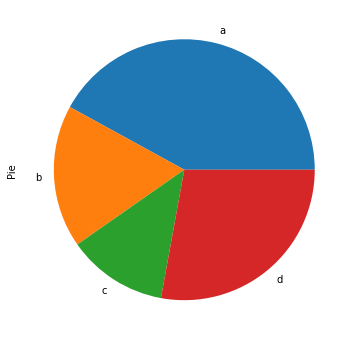

In [261]:
%matplotlib inline 
# displays plots in the notebook

# ---------------------------Histogram----------------------------
# It provides an approximation of the distribution of results. 
# create them by dividing the range of values into bins or buckets. (classes) 
# Then you count how many of the results fall into each bin.
# Rolls 2 dice 5000 times and charts the frequency and a histogram

# Even though the odds increase as you approach 7 and then decrease again 
# 1 way to roll a 2: (1, 1)
# 6 ways to roll a 7: [(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)] 
# and again 1 way to roll a 12: (6, 6)
# each tuple represents the result in two different dices
# over many rolls they are nearly equal.
diceDF = pd.DataFrame(
        np.random.randint(1, 7, 5000),
        columns=['Hist'])

diceDF['Odds'] = diceDF['Hist'] + np.random.randint(1, 7, 5000)

# diceDF.plot.hist(bins=12, alpha=0.5)
# bins=12, 12 different ways of rolling the dice, the result are stored in these bins(classes)
# alpha: opacity


# --------------------------Line PLot--------------------------------
series_9 = pd.Series(np.random.randn(1000),
                 index=pd.date_range('11/15/2017', periods=1000))
series_9 = series_9.cumsum()
# series_9.plot()

# Basic plot using 3 different data with
# 1000 random values that create cumulative sums over an increasing date range
dataframe22 = pd.DataFrame(np.random.randn(1000, 3), 
                     index=pd.date_range('11/15/2017', 
                     periods=1000),
                     columns=list('ABC'))
dataframe22 = dataframe22.cumsum()
# dataframe22.plot()


# -------------------------Bar Chart-------------------------
# pd.DataFrame(np.random.randn(5)).plot.bar()

# multiple bar charts
vals = ['A', 'B', 'C', 'D']
dataframe23 = pd.DataFrame(np.random.randn(10, 4), columns=vals)
# dataframe23.plot.bar()
# create 10 arrays conatining 4 random values


# ------------------------Area Plot-----------------------------

xVals = range(1, 15)
yVals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]

# plt.fill_between(xVals, yVals, color='skyblue', alpha=0.5)
# plt.show()

# area plot with multiple areas
# pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C']).plot.area()


# ----------------------Scatter PLot-----------------------------
# Create a scatterplot with 100 random values
# pd.DataFrame(np.random.rand(100, 2), columns=['A', 'B']).plot.scatter(x='A', y='B')

# Multiple column scatter plots
dataframe23 = pd.DataFrame(np.random.rand(50, 4), columns=['A', 'B', 'C', 'D'])
# ax = dataframe23.plot.scatter(x='A', y='B', color='DarkBlue', label='Group 1')
# dataframe23.plot.scatter(x='C', y='D', color='Orange', label='Group 2', ax=ax)


# --------------------------Pie Chart------------------------------
pd.Series(np.random.rand(4), index=['a', 'b', 'c', 'd'], name='Pie').plot.pie(figsize=(6, 6))